In [1]:
import numpy as np
import pandas as pd
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt\


import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("SMSSpamCollection.txt",sep="\t" ,names=["labels","messages"])
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.shape

(5572, 2)

In [4]:
data.isnull().sum()

labels      0
messages    0
dtype: int64

In [5]:
data.duplicated().sum()

403

In [6]:
data=data.drop_duplicates()

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(5169, 2)

In [9]:
data['labels'].value_counts()

labels
ham     4516
spam     653
Name: count, dtype: int64

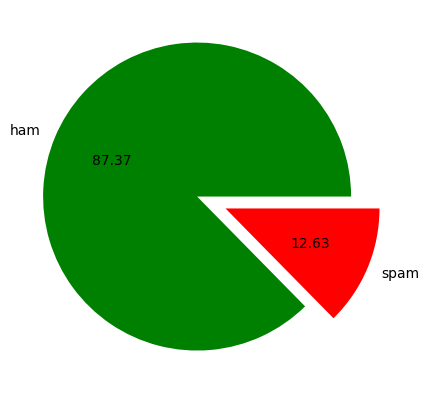

In [10]:
plt.figure(figsize=(9, 5))

plt.pie(data['labels'].value_counts(),labels=['ham','spam'],autopct='%0.2f', colors=['Green', 'Red'], explode = [.1, .1])
plt.show()


In [11]:
data['messages'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
data['num_characters']=data['messages'].apply(len)
data.head()

,labels,messages,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
from nltk.tokenize import word_tokenize
data['messages'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: messages, Length: 5169, dtype: object

In [15]:
data['num_words']=data['messages'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,labels,messages,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [16]:
data['num_sentences']=data['messages'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head()

,labels,messages,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
data[data['labels']=='ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
data[data['labels']=='spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

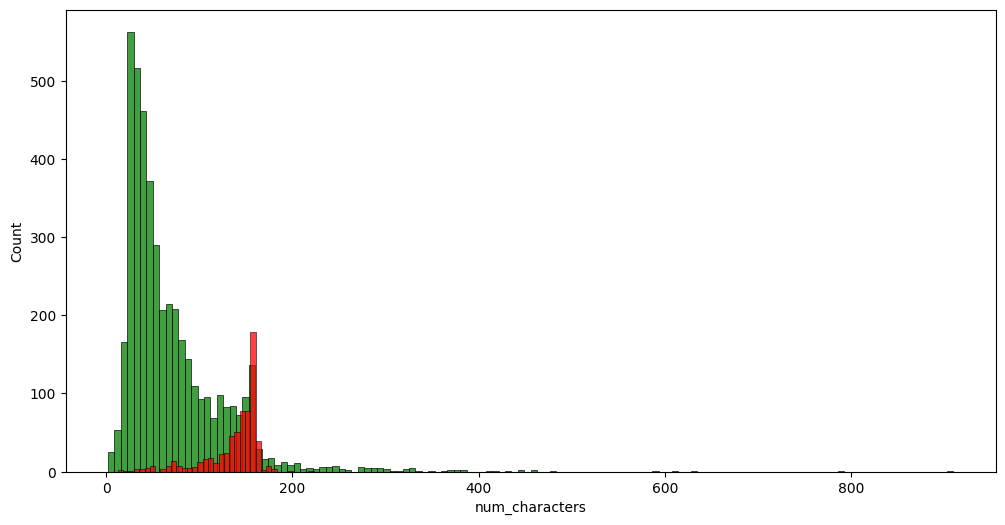

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(data[data["labels"]=="ham"]["num_characters"],color="green")
sns.histplot(data[data["labels"]=="spam"]["num_characters"],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

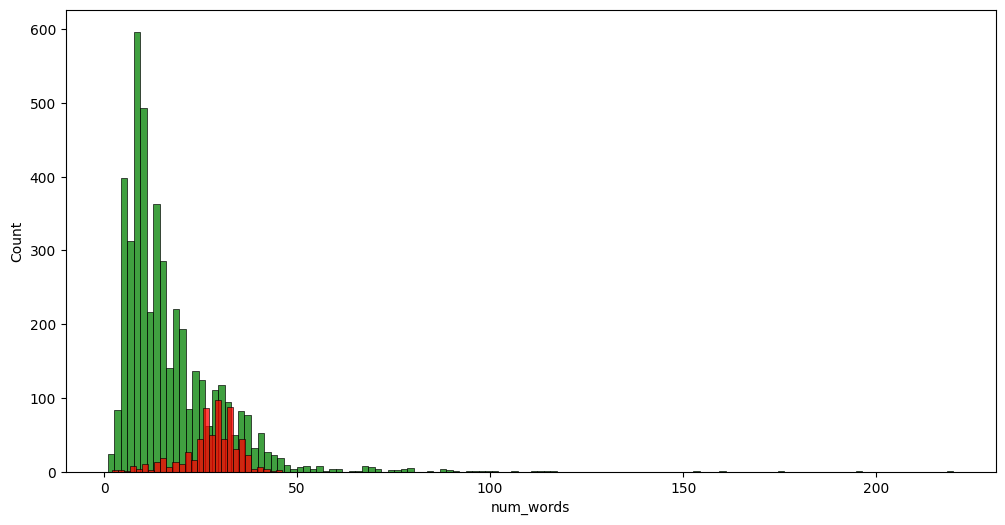

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['labels']=='ham']['num_words'],color='green')
sns.histplot(data[data['labels']=='spam']['num_words'],color='red')

In [21]:
from wordcloud import WordCloud

In [22]:
ham_msg_text=data[data.labels=="ham"].messages
spam_msg_text=data[data.labels=="spam"].messages

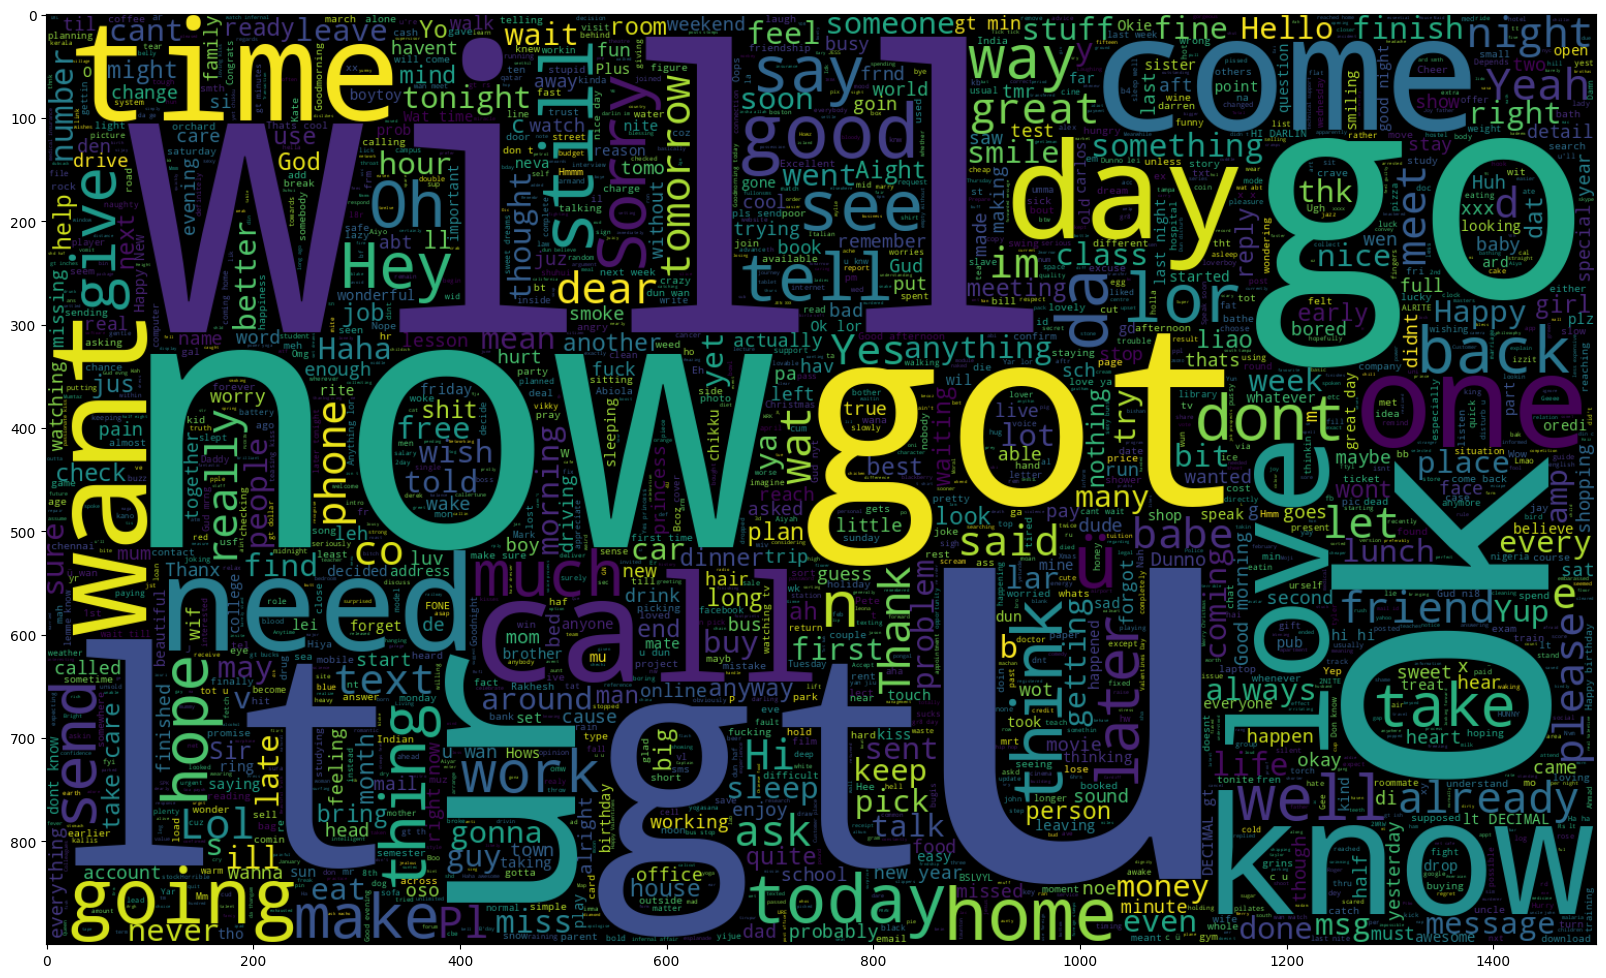

In [23]:
plt.figure(figsize=(20,22))
wc=WordCloud(width=1500,height=900,max_words=2500).generate(" ".join(ham_msg_text))
plt.imshow(wc, interpolation='bilinear')

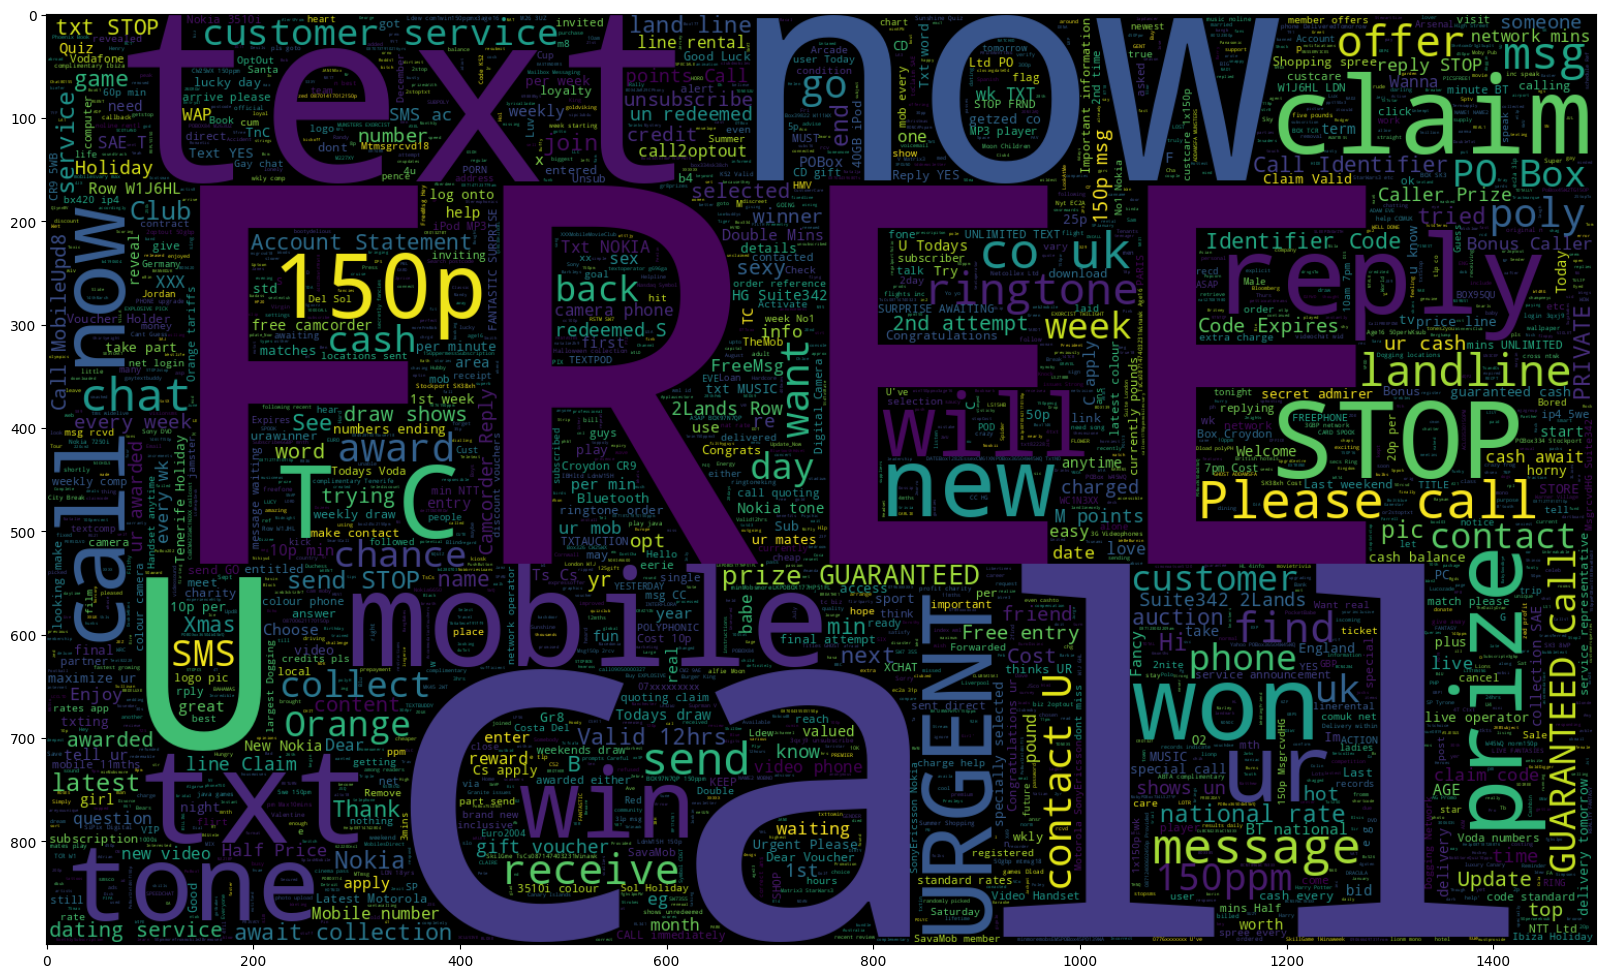

In [24]:
plt.figure(figsize = (20, 22))
wc = WordCloud(width = 1500, height = 900, max_words = 2500).generate(" ".join(spam_msg_text))
plt.imshow(wc, interpolation='bilinear')

In [25]:
#noisy data
u=data["messages"][5]
u

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"

In [26]:
v = data['messages'][8]
v

'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [27]:
def remove_punc(text):
 trans=str.maketrans("","",string.punctuation)
 return text.translate(trans)

In [28]:
data["messages"]=data["messages"].apply(remove_punc)

In [29]:
data["messages"][8]

'WINNER As a valued network customer you have been selected to receivea £900 prize reward To claim call 09061701461 Claim code KL341 Valid 12 hours only'

In [30]:
def remove_noise(text):
  t = re.sub('[^a-zA-Z]', ' ', text)
  return t

In [31]:
data['messags'] = data['messages'].apply(remove_noise)

In [32]:
data["messages"][8]

'WINNER As a valued network customer you have been selected to receivea £900 prize reward To claim call 09061701461 Claim code KL341 Valid 12 hours only'

In [33]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
from nltk.corpus import stopwords
sw=stopwords.words("english")

In [35]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
len(sw)

179

In [37]:
def remove_sws(text):
  s = [word.lower() for word in text.split() if word.lower() not in sw]
  return " ".join(s)

In [38]:
data['messages'] = data['messages'].apply(remove_sws)

In [39]:
data["messages"][8]

'winner valued network customer selected receivea £900 prize reward claim call 09061701461 claim code kl341 valid 12 hours'

In [40]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [41]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma(text):
  l = [lemmatizer.lemmatize(word) for word in text.split()]
  return " ".join(l)

In [42]:
data['messages'] = data['messages'].apply(lemma)

In [43]:
data.head()

,labels,messages,num_characters,num_words,num_sentences,messags
0,ham,go jurong point crazy available bugis n great ...,111,24,2,Go until jurong point crazy Available only in ...
1,ham,ok lar joking wif u oni,29,8,2,Ok lar Joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,155,37,2,Free entry in a wkly comp to win FA Cup fina...
3,ham,u dun say early hor u c already say,49,13,1,U dun say so early hor U c already then say
4,ham,nah dont think go usf life around though,61,15,1,Nah I dont think he goes to usf he lives aroun...


In [44]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

data['labels']=encoder.fit_transform(data['labels'])

In [45]:
data.head()

,labels,messages,num_characters,num_words,num_sentences,messags
0,0,go jurong point crazy available bugis n great ...,111,24,2,Go until jurong point crazy Available only in ...
1,0,ok lar joking wif u oni,29,8,2,Ok lar Joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...,155,37,2,Free entry in a wkly comp to win FA Cup fina...
3,0,u dun say early hor u c already say,49,13,1,U dun say so early hor U c already then say
4,0,nah dont think go usf life around though,61,15,1,Nah I dont think he goes to usf he lives aroun...


In [46]:
data = data[['labels','messages']]

In [47]:
data.head()

,labels,messages
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

In [49]:
X = tf.fit_transform(data['messages']).toarray()
y = data['labels']

In [50]:
X



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5169, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135, 3000), (1034, 3000), (4135,), (1034,))

In [54]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
clf = BernoulliNB()

In [56]:
clf.fit(X_train, y_train)

BernoulliNB()

In [57]:
y_pred = clf.predict(X_test)

In [58]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.9893617021276596


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       917
           1       0.96      0.94      0.95       117

    accuracy                           0.99      1034
   macro avg       0.98      0.97      0.97      1034
weighted avg       0.99      0.99      0.99      1034



Text(120.72222222222221, 0.5, 'Truth')

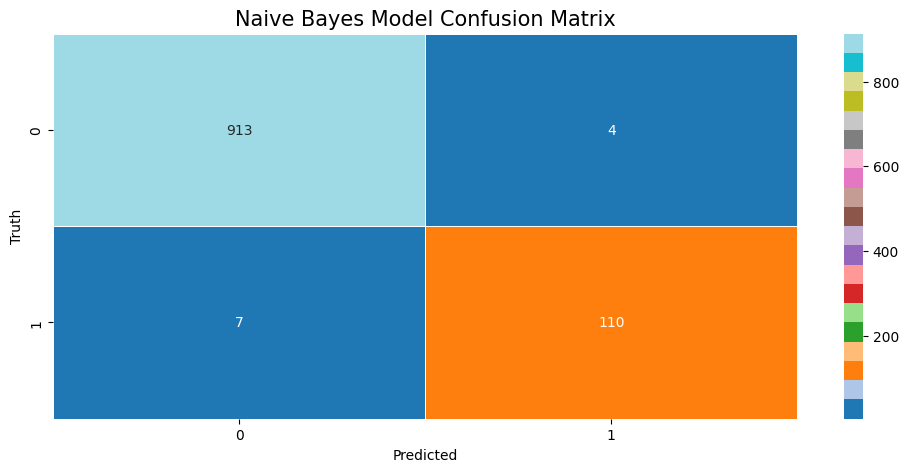

In [60]:

import seaborn as sn
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (12,5))
sn.heatmap(cm, annot=True,linewidth = 0.5 , cmap = 'tab20' , fmt='d')
plt.title('Naive Bayes Model Confusion Matrix', size=15)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))